In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ds = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Pochopenie dát

In [68]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
ds.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
#Pretypovanie atributu na numericke hodnoty
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [71]:
#Nevedeli sme premeniť kvoli prazdnemu stringu, preto ho nahradime nan hodnotou aby sme mohli zmenit atribut na numericke hodnoty
ds['TotalCharges'] = ds['TotalCharges'].replace(' ',np.nan)
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'])

In [72]:
ds.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [73]:
ds[ds['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Základné štatistiky

In [74]:
#Nahliadnutie základnych štatistík atribútov
ds.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


In [75]:
ds["OnlineBackup"].describe()

count     7043
unique       3
top         No
freq      3088
Name: OnlineBackup, dtype: object

In [76]:
#Zisťovanie konkretnych unikatnych hodnot
categorical_columns = ds.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n--- {col} ---")
    print(ds[col].value_counts())


--- customerID ---
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

--- gender ---
gender
Male      3555
Female    3488
Name: count, dtype: int64

--- Partner ---
Partner
No     3641
Yes    3402
Name: count, dtype: int64

--- Dependents ---
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

--- PhoneService ---
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

--- OnlineBackup -

In [77]:
#Zisťovanie duplicitných hodnôt
ds.duplicated().sum()

np.int64(0)

### Vizualizácia dát

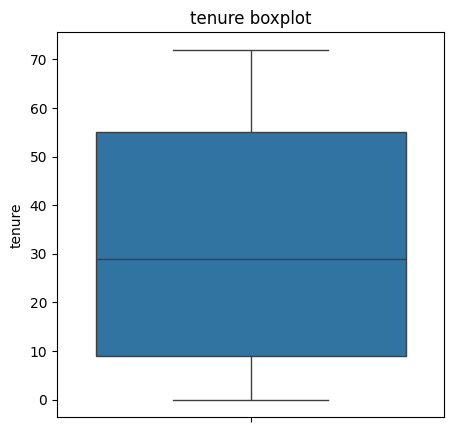

In [78]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=ds["tenure"])
plt.ylabel("tenure")
plt.title("tenure boxplot")
plt.show()

Text(0.5, 1.0, 'Tenure vs Churn')

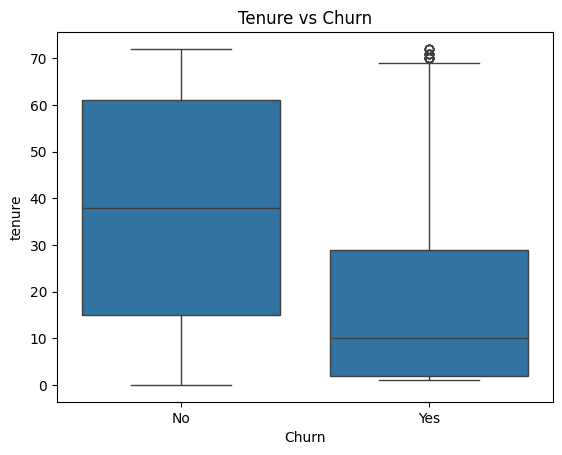

In [79]:
sns.boxplot(x='Churn', y='tenure', data=ds,).set_title("Tenure vs Churn")

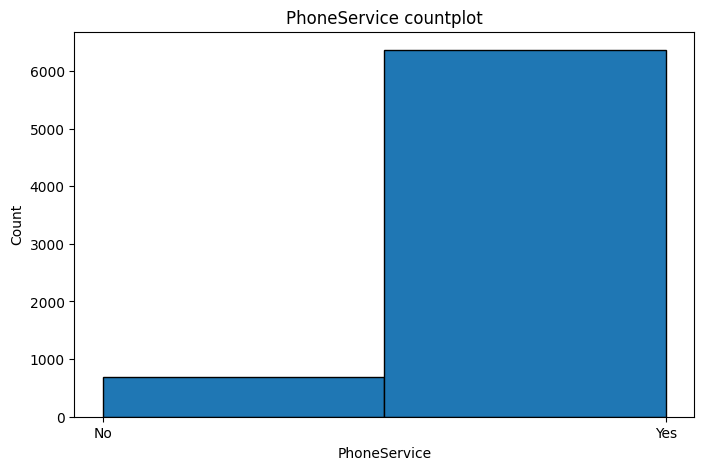

In [80]:
plt.figure(figsize=(8, 5))
plt.hist(ds["PhoneService"], bins=2, edgecolor='black')
plt.xlabel("PhoneService")
plt.ylabel("Count")
plt.title("PhoneService countplot")
plt.show()

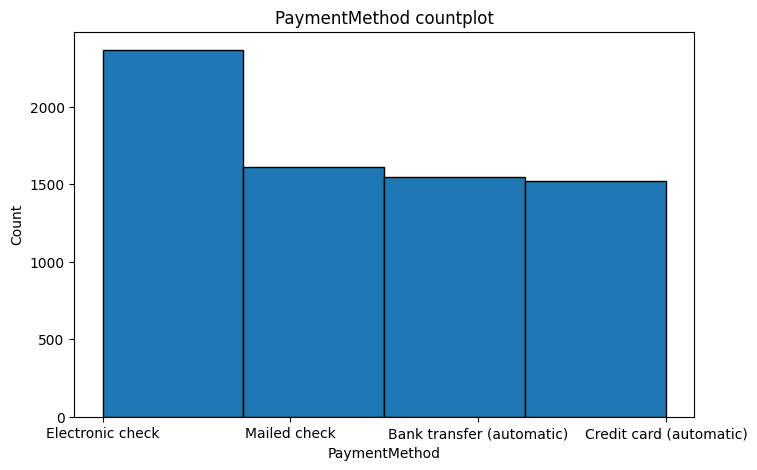

In [81]:
plt.figure(figsize=(8, 5))
plt.hist(ds["PaymentMethod"], bins=4, edgecolor='black')
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.title("PaymentMethod countplot")
plt.show()

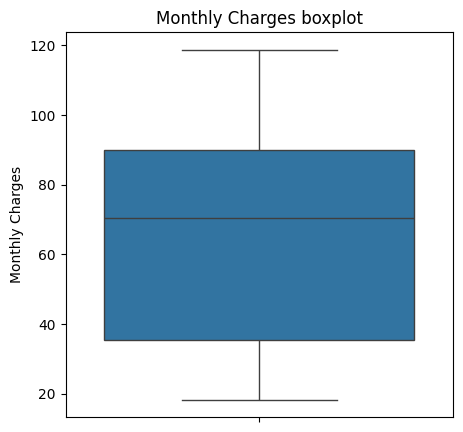

In [82]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=ds["MonthlyCharges"])
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges boxplot")
plt.show()

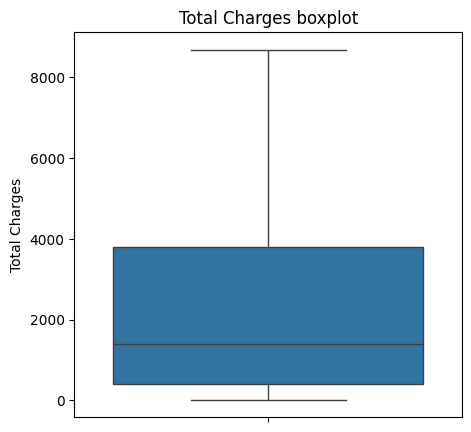

In [83]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=ds["TotalCharges"])
plt.ylabel("Total Charges")
plt.title("Total Charges boxplot")
plt.show()

Text(0.5, 1.0, 'TotalCharges vs Churn')

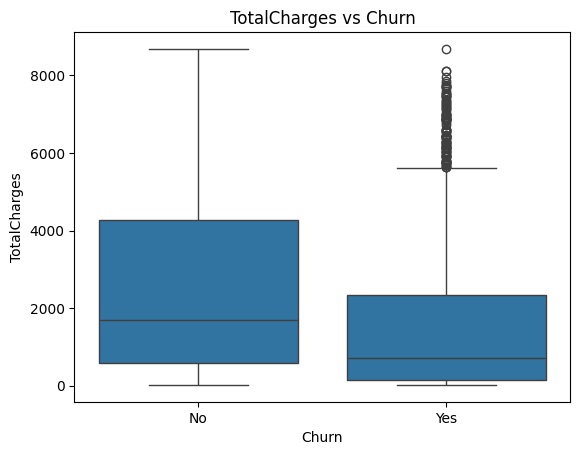

In [84]:
sns.boxplot(x='Churn', y='TotalCharges', data=ds,).set_title("TotalCharges vs Churn")

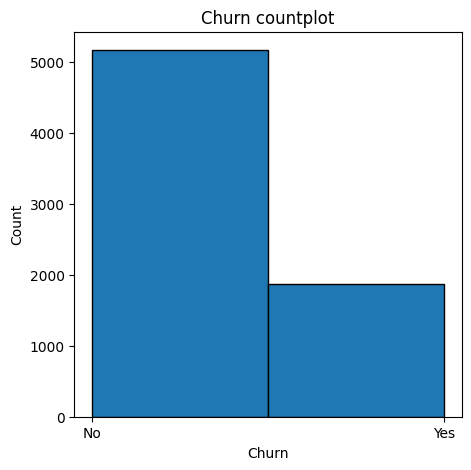

In [85]:
plt.figure(figsize=(5, 5))
plt.hist(ds["Churn"], bins=2, edgecolor='black')
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn countplot")
plt.show()

In [86]:
ds['Churn'] = ds['Churn'].map({'Yes': 1, 'No': 0})

In [87]:
cor_hp = ['tenure','TotalCharges','MonthlyCharges']
cor_tab = ds[cor_hp].corr()
cor_tab

,tenure,TotalCharges,MonthlyCharges
tenure,1.00000,0.825880,0.247900
TotalCharges,0.82588,1.000000,0.651065
MonthlyCharges,0.24790,0.651065,1.000000


<Axes: >

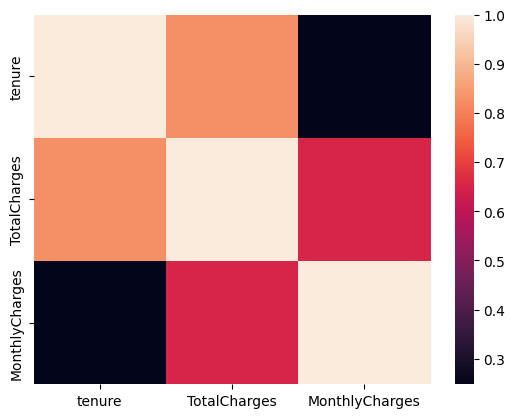

In [88]:
sns.heatmap(cor_tab)

# Príprava dát

### Čistenie dát

In [89]:
# Nahradíme NaN hodnoty v TotalCharges
ds['TotalCharges'] = ds['TotalCharges'].fillna(ds['tenure'] * ds['MonthlyCharges'])

# Skontrolujeme, či už sú hodnoty v 'TotalCharges' vyplnené
print(ds['TotalCharges'].isnull().sum())

0


In [90]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Transformácia

In [91]:
#Diskretizácia atribútov
ds['tenure_binned'] = pd.cut(ds['tenure'], bins=[0, 12, 24, 60, 100], labels=['short', 'medium', 'long', 'very long'])

ds['monthly_bin'] = pd.qcut(ds['MonthlyCharges'], q=4, labels=['low', 'medium', 'high', 'very high'])

ds['total_bin'] = pd.qcut(ds['TotalCharges'], q=4, labels=['low', 'medium', 'high', 'very high'])

In [92]:
dis_val = ds[['tenure_binned','monthly_bin','total_bin']]
for x in dis_val:
    print(f"\n--- {x} ---")
    print(ds[x].value_counts())


--- tenure_binned ---
tenure_binned
long         2426
short        2175
very long    1407
medium       1024
Name: count, dtype: int64

--- monthly_bin ---
monthly_bin
medium       1766
low          1762
very high    1758
high         1757
Name: count, dtype: int64

--- total_bin ---
total_bin
low          1762
very high    1761
medium       1760
high         1760
Name: count, dtype: int64


<Axes: xlabel='tenure_binned', ylabel='count'>

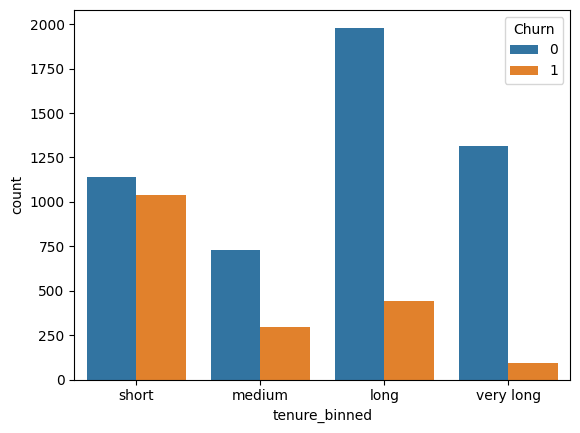

In [93]:
sns.countplot(data=ds, x='tenure_binned', hue='Churn')

<Axes: xlabel='total_bin', ylabel='count'>

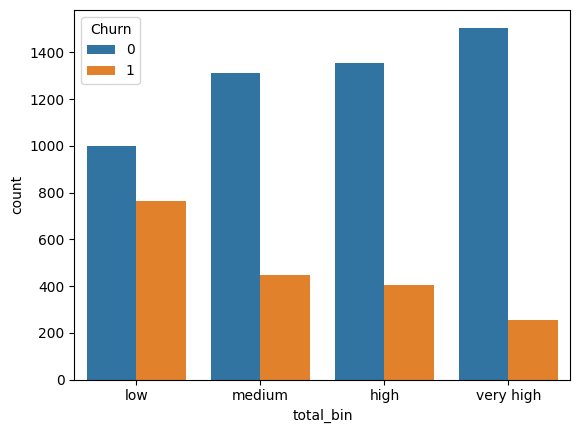

In [94]:
sns.countplot(data=ds, x='total_bin', hue='Churn')

<Axes: xlabel='monthly_bin', ylabel='count'>

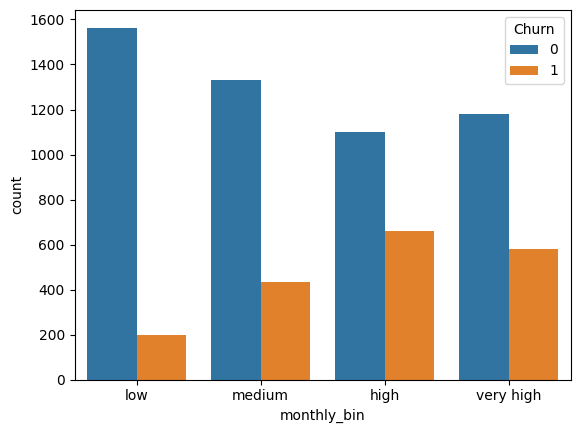

In [95]:
sns.countplot(data=ds, x='monthly_bin', hue='Churn')

In [96]:
unique_val = ds[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]
for x in unique_val:
    print(f"\n--- {x} ---")
    print(ds[x].value_counts())


--- MultipleLines ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

--- StreamingTV ---
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

--- StreamingMovies ---
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name

In [97]:
ds['MultipleLines'] = ds['MultipleLines'].replace('No phone service', 'No')
ds['OnlineSecurity'] = ds['OnlineSecurity'].replace('No internet service', 'No')
ds['OnlineBackup'] = ds['OnlineBackup'].replace('No internet service', 'No')
ds['DeviceProtection'] = ds['DeviceProtection'].replace('No internet service', 'No')
ds['TechSupport'] = ds['TechSupport'].replace('No internet service', 'No')
ds['StreamingTV'] = ds['StreamingTV'].replace('No internet service', 'No')
ds['StreamingMovies'] = ds['StreamingMovies'].replace('No internet service', 'No')

In [98]:
unique_val = ds[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]
for x in unique_val:
    print(f"\n--- {x} ---")
    print(ds[x].value_counts())


--- MultipleLines ---
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

--- StreamingTV ---
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

--- StreamingMovies ---
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64


In [99]:
ds = ds.drop("customerID", axis=1)

### Výber atribútov na modelovanie

C:\Users\PC\AppData\Local\Temp\ipykernel_16032\4052766236.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2 Statistika', y='Atribút', data=results_df_sorted.head(top_k), palette='viridis')


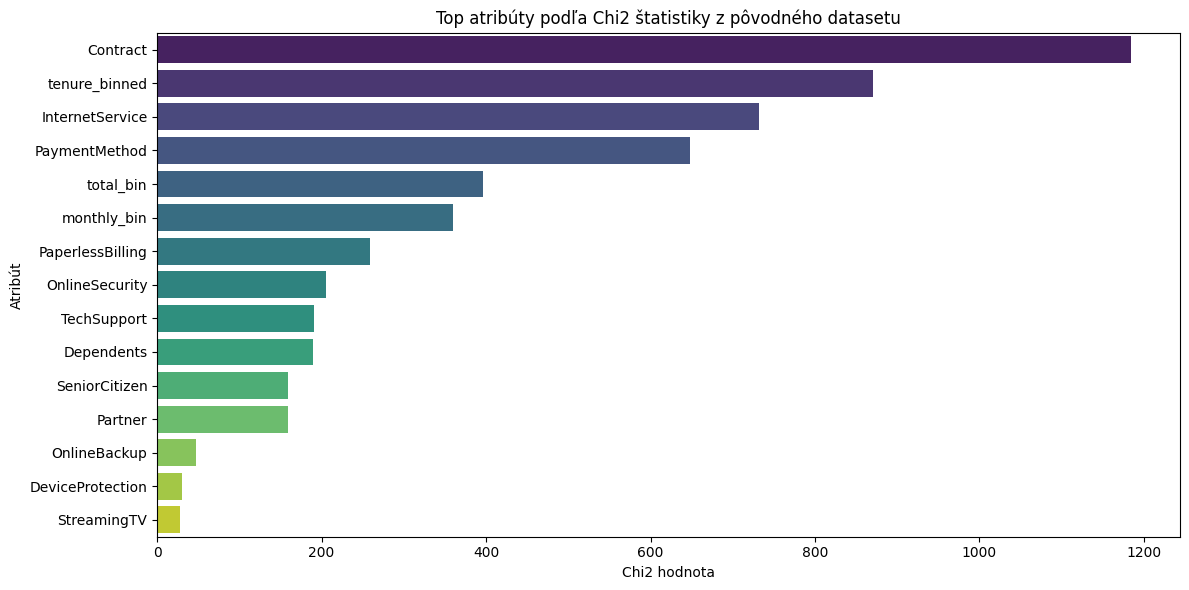

             Atribút  Chi2 Statistika      P-hodnota
14          Contract      1184.596572  5.863038e-258
4      tenure_binned       870.405412  2.323620e-188
7    InternetService       732.309590  9.571788e-160
16     PaymentMethod       648.142327  3.682355e-140
18         total_bin       396.050380   1.587305e-85
17       monthly_bin       359.779611   1.137655e-77
15  PaperlessBilling       258.277649   4.073355e-58
8     OnlineSecurity       205.633104   1.232098e-46
11       TechSupport       190.166842   2.923567e-43
3         Dependents       189.129249   4.924922e-43
1      SeniorCitizen       159.426300   1.510067e-36
2            Partner       158.733382   2.139911e-36
9       OnlineBackup        47.260854   6.214093e-12
10  DeviceProtection        30.513395   3.315693e-08
12       StreamingTV        27.862522   1.302484e-07
13   StreamingMovies        26.251336   2.997474e-07
6      MultipleLines        11.143251   8.433795e-04
5       PhoneService         0.915033   3.3878

In [100]:
#CHI Square test pre povodny dataset

from scipy.stats import chi2_contingency
labels1 = ["gender", "SeniorCitizen", "Partner", "Dependents", "tenure_binned", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","monthly_bin","total_bin"]
X = ds[labels1]
y = ds["Churn"]

results = []


for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    results.append({
        'Atribút': column,
        'Chi2 Statistika': chi2_stat,
        'P-hodnota': p_value
    })

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='Chi2 Statistika', ascending=False)

top_k = 15
plt.figure(figsize=(12, 6))
sns.barplot(x='Chi2 Statistika', y='Atribút', data=results_df_sorted.head(top_k), palette='viridis')
plt.title('Top atribúty podľa Chi2 štatistiky z pôvodného datasetu')
plt.xlabel('Chi2 hodnota')
plt.ylabel('Atribút')
plt.tight_layout()
plt.show()

print(results_df_sorted)

In [101]:
#Vytvorenie datasetu cez label encoder
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
                        'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn','tenure_binned','monthly_bin','total_bin']

ds_label_encoded = ds.copy()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    ds_label_encoded[col] = le.fit_transform(ds_label_encoded[col])
    label_encoders[col] = le

In [102]:
ds_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [103]:
ds_label_encoded = ds_label_encoded.drop(columns=['tenure','TotalCharges','MonthlyCharges'])

C:\Users\PC\AppData\Local\Temp\ipykernel_16032\1807500570.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2 Statistika', y='Atribút', data=results_df_sorted.head(top_k), palette='viridis')


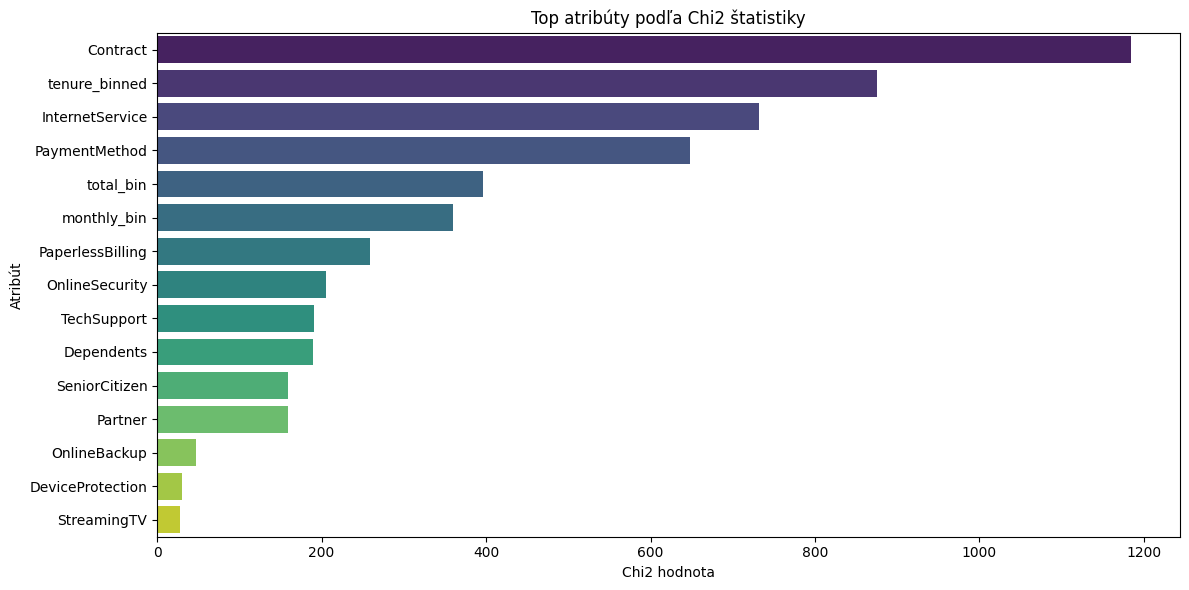

             Atribút  Chi2 Statistika      P-hodnota
13          Contract      1184.596572  5.863038e-258
16     tenure_binned       875.254102  3.828970e-188
6    InternetService       732.309590  9.571788e-160
15     PaymentMethod       648.142327  3.682355e-140
18         total_bin       396.050380   1.587305e-85
17       monthly_bin       359.779611   1.137655e-77
14  PaperlessBilling       258.277649   4.073355e-58
7     OnlineSecurity       205.633104   1.232098e-46
10       TechSupport       190.166842   2.923567e-43
3         Dependents       189.129249   4.924922e-43
1      SeniorCitizen       159.426300   1.510067e-36
2            Partner       158.733382   2.139911e-36
8       OnlineBackup        47.260854   6.214093e-12
9   DeviceProtection        30.513395   3.315693e-08
11       StreamingTV        27.862522   1.302484e-07
12   StreamingMovies        26.251336   2.997474e-07
5      MultipleLines        11.143251   8.433795e-04
4       PhoneService         0.915033   3.3878

In [104]:
X = ds_label_encoded.drop('Churn', axis=1)
y = ds_label_encoded["Churn"]

results = []

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    results.append({
        'Atribút': column,
        'Chi2 Statistika': chi2_stat,
        'P-hodnota': p_value
    })
results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values(by='Chi2 Statistika', ascending=False)

top_k = 15
plt.figure(figsize=(12, 6))
sns.barplot(x='Chi2 Statistika', y='Atribút', data=results_df_sorted.head(top_k), palette='viridis')
plt.title('Top atribúty podľa Chi2 štatistiky')
plt.xlabel('Chi2 hodnota')
plt.ylabel('Atribút')
plt.tight_layout()
plt.show()

print(results_df_sorted)

In [105]:
#Vytvorenie datasetu cez one hot encoding s pouzitim get_dummies
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_binned','monthly_bin','total_bin']

df_encoded = pd.get_dummies(ds, columns=categorical_columns)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   bool   
 6   gender_Male                              7043 non-null   bool   
 7   Partner_No                               7043 non-null   bool   
 8   Partner_Yes                              7043 non-null   bool   
 9   Dependents_No                            7043 non-null   bool   
 10  Dependents_Yes                           7043 no

In [106]:
df_encoded = df_encoded.drop(columns=['tenure','TotalCharges','MonthlyCharges'])

C:\Users\PC\AppData\Local\Temp\ipykernel_16032\155703657.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2 Statistika', y='Atribút', data=results_df_sorted3.head(top_k), palette='viridis')


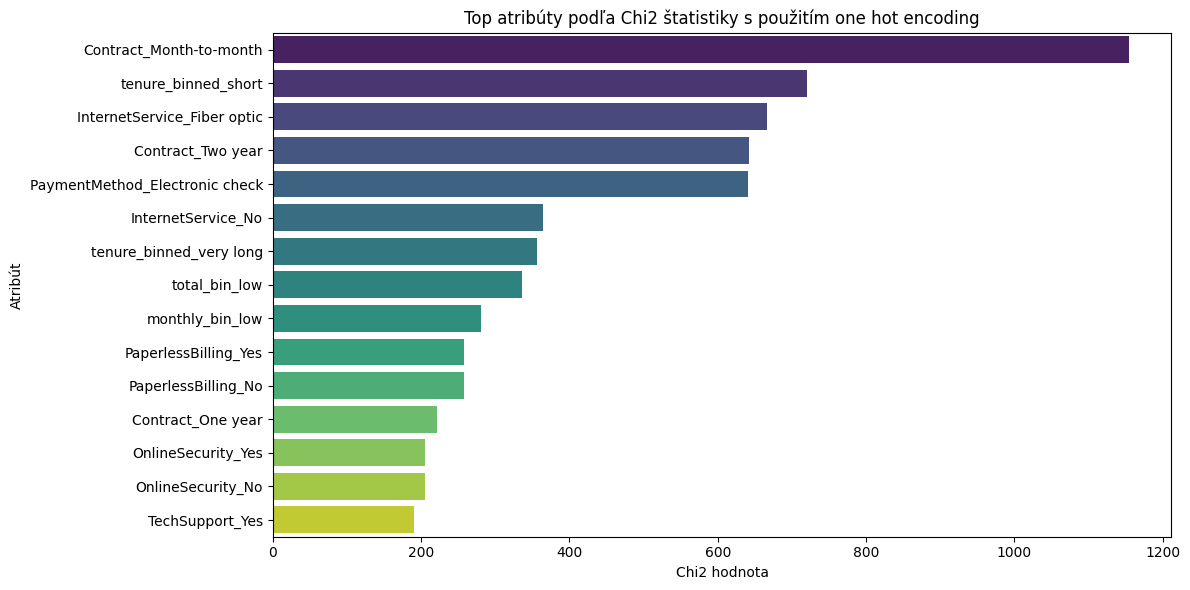

In [107]:
X = df_encoded.drop(columns=["Churn"])
y = ds["Churn"]

results = []

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    results.append({
        'Atribút': column,
        'Chi2 Statistika': chi2_stat,
        'P-hodnota': p_value
    })
results_df3 = pd.DataFrame(results)
results_df_sorted3 = results_df3.sort_values(by='Chi2 Statistika', ascending=False)

top_k = 15
plt.figure(figsize=(12, 6))
sns.barplot(x='Chi2 Statistika', y='Atribút', data=results_df_sorted3.head(top_k), palette='viridis')
plt.title('Top atribúty podľa Chi2 štatistiky s použitím one hot encoding')
plt.xlabel('Chi2 hodnota')
plt.ylabel('Atribút')
plt.tight_layout()
plt.show()

In [ ]:
#Vyber atributov na zaklade chi-square testu
ds_ohe = df_encoded[['Contract_Month-to-month','InternetService_Fiber optic','tenure_binned_short','PaymentMethod_Electronic check','Contract_Two year']]
ds_ole = ds_label_encoded[['PaperlessBilling','OnlineSecurity','TechSupport','Dependents']]

# Modelovanie a vyhodnotenie

In [109]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc

### CatBoost Classifier

In [110]:
#Vyber atributov na modelovanie na zaklade chi square testu
hlp = ['Contract', 'tenure_binned', 'InternetService',
       'PaymentMethod', 'total_bin',
       'monthly_bin', 'PaperlessBilling','OnlineSecurity','TechSupport','Dependents']

X = ds[hlp].copy()
y = ds['Churn']

cat_features = ['Contract', 'tenure_binned', 'InternetService',
       'PaymentMethod', 'total_bin',
       'monthly_bin', 'PaperlessBilling','OnlineSecurity','TechSupport','Dependents']

for col in cat_features:
    X[col] = X[col].astype(str) 

#Rozdelenie dát
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Tréning CatBoost modelu
cb_model = CatBoostClassifier(random_state=42) 
cb_model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose=False)

#Predikcia 
y_cb_pred = cb_model.predict(X_test)

#Vyhodnotenie modelu
print("\n=== CatBoost ===")
print("Úspešnosť:", accuracy_score(y_test, y_cb_pred))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_cb_pred))
print("\nReport:\n", classification_report(y_test, y_cb_pred))



=== CatBoost ===
Úspešnosť: 0.7917652626597255
Kontingenčná matica:
 [[1375  164]
 [ 276  298]]

Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.65      0.52      0.58       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



In [111]:
#Modelovanie s vyvažením triedy

over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)


cb_model1 = CatBoostClassifier(random_state=42, verbose=0)
cb_model1.fit(X_resampled, y_resampled, cat_features=cat_features, eval_set=(X_test, y_test), verbose=False)

y_cb_pred1 = cb_model1.predict(X_test)

print("\n=== CatBoost + RandomOverSampler ===")
print("Úspešnosť:", accuracy_score(y_test, y_cb_pred1))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_cb_pred1))
print("\nReport:\n", classification_report(y_test, y_cb_pred1))


=== CatBoost + RandomOverSampler ===
Úspešnosť: 0.7539044013251301
Kontingenčná matica:
 [[1139  400]
 [ 120  454]]

Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1539
           1       0.53      0.79      0.64       574

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.80      0.75      0.77      2113



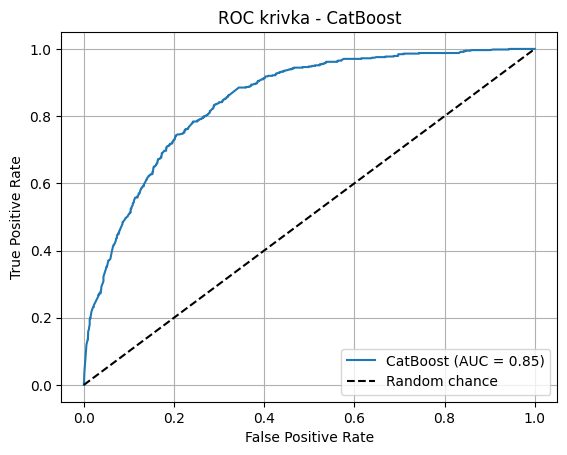

In [112]:
#AUC a ROC krivka

y_prob_cb = cb_model1.predict_proba(X_test)[:, 1]

fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)

auc_cb = auc(fpr_cb, tpr_cb)

plt.figure()
plt.plot(fpr_cb, tpr_cb, label=f'CatBoost (AUC = {auc_cb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC krivka - CatBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Random Forest

##### Knižnice pre random forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

##### Výber top atribútov na modelovanie

Počet v trénovacej množine: 5634
Počet v testovacej množine: 1409

=== Random Forest ===
Úspešnosť: 0.7743080198722498
Kontingenčná matica:
 [[913 122]
 [196 178]]
             feature  importance
13          Contract    0.117641
15     PaymentMethod    0.101775
16     tenure_binned    0.083302
6    InternetService    0.071812
18         total_bin    0.065804
0             gender    0.057796
2            Partner    0.047304
8       OnlineBackup    0.046913
14  PaperlessBilling    0.044812
17       monthly_bin    0.044407


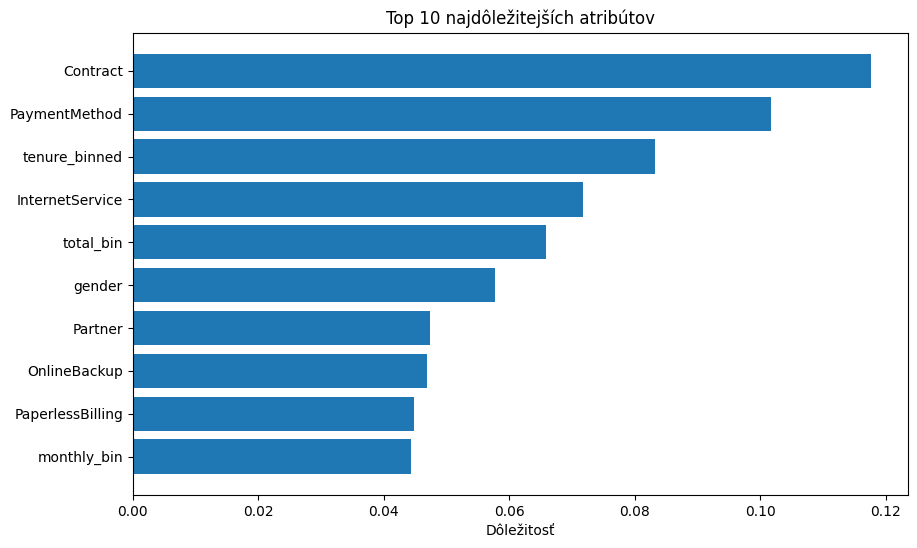

In [114]:
X2 = ds_label_encoded.drop('Churn', axis=1)
y2 = ds_label_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

print("Počet v trénovacej množine:", len(X_train))
print("Počet v testovacej množine:", len(X_test))

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Predikcia
y_pred_rf = rf_model.predict(X_test)

#Vyhodnotenie modelu
print("\n=== Random Forest ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_rf))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_rf))

importances = rf_model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df.head(10))

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 najdôležitejších atribútov")
plt.xlabel("Dôležitosť")
plt.show()

In [115]:
cat_rf = ['Contract','PaymentMethod','Partner','tenure_binned','monthly_bin','total_bin','InternetService','OnlineBackup','gender','PaperlessBilling']
X3 = ds_label_encoded[cat_rf]
y3 = ds_label_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

print("Počet v trénovacej množine:", len(X_train))
print("Počet v testovacej množine:", len(X_test))

rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X_train, y_train)

#Predikcia
y_pred_rf1 = rf_model1.predict(X_test)

#Vyhodnotenie modelu
print("\n=== Random Forest ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_rf1))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_rf1))
print("\nReport:\n", classification_report(y_test, y_pred_rf1))

Počet v trénovacej množine: 5634
Počet v testovacej množine: 1409

=== Random Forest ===
Úspešnosť: 0.7608232789212207
Kontingenčná matica:
 [[891 144]
 [193 181]]

Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.56      0.48      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [116]:
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

rf_model2 = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_model2.fit(X_resampled, y_resampled)

y_pred_rf2 = rf_model2.predict(X_test)

print("\n=== Random Forest + RandomOverSampler ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_rf2))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_rf2))
print("\nReport:\n", classification_report(y_test, y_pred_rf2))


=== Random Forest + RandomOverSampler ===
Úspešnosť: 0.7324343506032647
Kontingenčná matica:
 [[771 264]
 [113 261]]

Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.50      0.70      0.58       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409



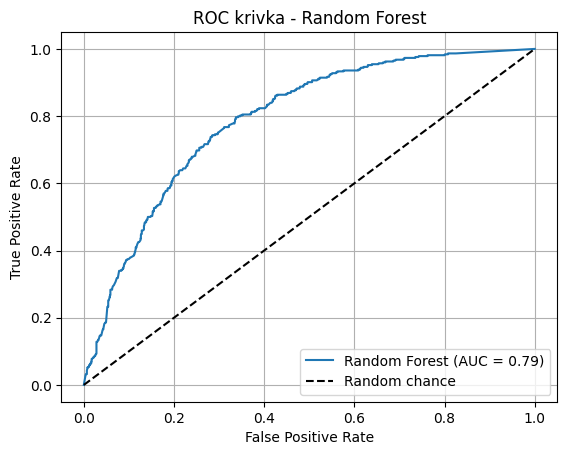

In [117]:
y_prob_rf = rf_model2.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC krivka - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [118]:
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

rf_model3 = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_model3.fit(X_resampled, y_resampled)

y_pred_rf3 = rf_model3.predict(X_test)

print("\n=== Random Forest + RandomOverSampler + ENN ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_rf3))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_rf3))
print("\nReport:\n", classification_report(y_test, y_pred_rf3))


=== Random Forest + RandomOverSampler + ENN ===
Úspešnosť: 0.7508871540099361
Kontingenčná matica:
 [[980  55]
 [296  78]]

Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85      1035
           1       0.59      0.21      0.31       374

    accuracy                           0.75      1409
   macro avg       0.68      0.58      0.58      1409
weighted avg       0.72      0.75      0.70      1409



## Decision Tree

##### knižnice pre Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Top 10 najdôležitejších atribútov:
             Feature  Importance
13          Contract    0.196791
15     PaymentMethod    0.084181
6    InternetService    0.063305
0             gender    0.056715
16     tenure_binned    0.056694
18         total_bin    0.056107
2            Partner    0.051217
14  PaperlessBilling    0.048226
9   DeviceProtection    0.044665
8       OnlineBackup    0.041660


C:\Users\PC\AppData\Local\Temp\ipykernel_16032\653390793.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='viridis')


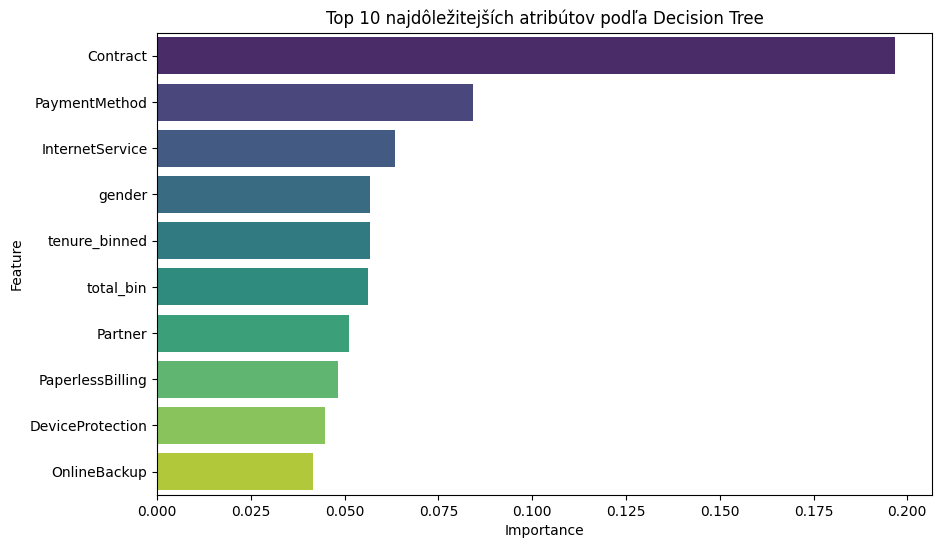

In [120]:
X4 = ds_label_encoded.drop(columns=['Churn'])
y4 = ds_label_encoded['Churn']

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X4, y4)

importances = dt.feature_importances_
feature_names = X4.columns

feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print("Top 10 najdôležitejších atribútov:")
print(feature_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='viridis')
plt.title("Top 10 najdôležitejších atribútov podľa Decision Tree")
plt.show()

In [ ]:
hlp = ['Contract','PaymentMethod','InternetService','total_bin','tenure_binned','gender','Partner','OnlineBackup','DeviceProtection','PaperlessBilling']
X5 = ds_label_encoded[hlp]
y5 = ds_label_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

#Predikcia
y_pred_dt = model_dt.predict(X_test)

#Vyhodnotenie modelu
print("\n=== Decision Tree ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_dt))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_dt))
print("\nReport:\n", classification_report(y_test, y_pred_dt))


=== Decision Tree ===
Úspešnosť: 0.7672107877927609
Kontingenčná matica:
 [[893 143]
 [185 188]]

Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1036
           1       0.57      0.50      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [122]:
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

model_dt2 = DecisionTreeClassifier(random_state=42)
model_dt2.fit(X_resampled, y_resampled)

y_pred_dt2 = model_dt2.predict(X_test)

print("\n=== Decision Tree + Up sampling ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_dt2))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_dt2))
print("\nReport:\n", classification_report(y_test, y_pred_dt2))


=== Decision Tree + Up sampling ===
Úspešnosť: 0.7331440738112136
Kontingenčná matica:
 [[766 270]
 [106 267]]

Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1036
           1       0.50      0.72      0.59       373

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.73      0.75      1409



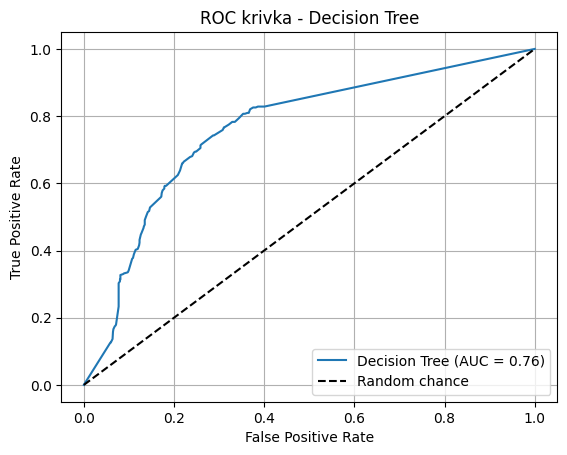

In [123]:
#AUC a ROC krivka
y_prob_dt = model_dt2.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC krivka - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [124]:
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

model_dt3 = DecisionTreeClassifier(random_state=42)
model_dt3.fit(X_resampled, y_resampled)

y_pred_dt3 = model_dt3.predict(X_test)

print("\n=== Decision Tree + Up sampling + ENN ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_dt3))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_dt3))
print("\nReport:\n", classification_report(y_test, y_pred_dt3))


=== Decision Tree + Up sampling + ENN ===
Úspešnosť: 0.7551454932576295
Kontingenčná matica:
 [[972  64]
 [281  92]]

Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85      1036
           1       0.59      0.25      0.35       373

    accuracy                           0.76      1409
   macro avg       0.68      0.59      0.60      1409
weighted avg       0.73      0.76      0.72      1409



## Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [134]:
X6 = pd.concat([ds_ohe,ds_ole], axis=1)
y6 = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

log_reg_model1 = LogisticRegression(max_iter=1000, random_state=42)

#Trénovanie modelu
log_reg_model1.fit(X_train, y_train)

#Predikcia 
y_pred_lr1 = log_reg_model1.predict(X_test)

#Vyhodnotenie modelu
print("\n=== Logistic Regression ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_lr1))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_lr1))
print("\nReport:\n", classification_report(y_test, y_pred_lr1))


=== Logistic Regression ===
Úspešnosť: 0.8069552874378992
Kontingenčná matica:
 [[943  93]
 [179 194]]

Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [135]:
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

log_reg_model2 = LogisticRegression(max_iter=1000)
log_reg_model2.fit(X_resampled, y_resampled)

y_pred_lr2 = log_reg_model2.predict(X_test)

print("\n=== Logistic Regression + Up sampling ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_lr2))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_lr2))
print("\nReport:\n", classification_report(y_test, y_pred_lr2))


=== Logistic Regression + Up sampling ===
Úspešnosť: 0.7324343506032647
Kontingenčná matica:
 [[712 324]
 [ 53 320]]

Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79      1036
           1       0.50      0.86      0.63       373

    accuracy                           0.73      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.82      0.73      0.75      1409



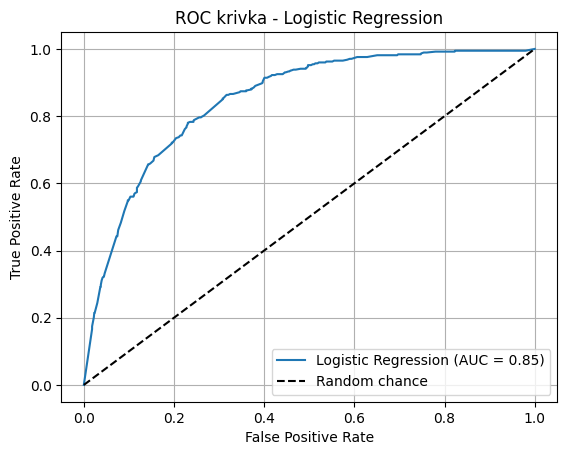

In [136]:
y_prob_lr = log_reg_model2.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC krivka - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## XGBoost Classifier

In [142]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [143]:
xg_model = XGBClassifier(random_state = 42)

#Trénovanie modelu
xg_model.fit(X_train, y_train)

#Predikcia 
y_pred_xg1 = xg_model.predict(X_test)

#Vyhodnotenie modelu
print("\n=== XGBoost ===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_xg1))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_xg1))
print("\nReport:\n", classification_report(y_test, y_pred_xg1))


=== XGBoost ===
Úspešnosť: 0.7934705464868701
Kontingenčná matica:
 [[926 110]
 [181 192]]

Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [144]:
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

xg_model1 = XGBClassifier(random_state = 42)
xg_model1.fit(X_resampled, y_resampled)

y_pred_xg2 = xg_model1.predict(X_test)

#Vyhodnotenie modelu
print("\n=== XGBoost + Up sampling===")
print("Úspešnosť:", accuracy_score(y_test, y_pred_xg2))
print("Kontingenčná matica:\n", confusion_matrix(y_test, y_pred_xg2))
print("\nReport:\n", classification_report(y_test, y_pred_xg2))


=== XGBoost + Up sampling===
Úspešnosť: 0.7253371185237757
Kontingenčná matica:
 [[718 318]
 [ 69 304]]

Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.79      1036
           1       0.49      0.82      0.61       373

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409



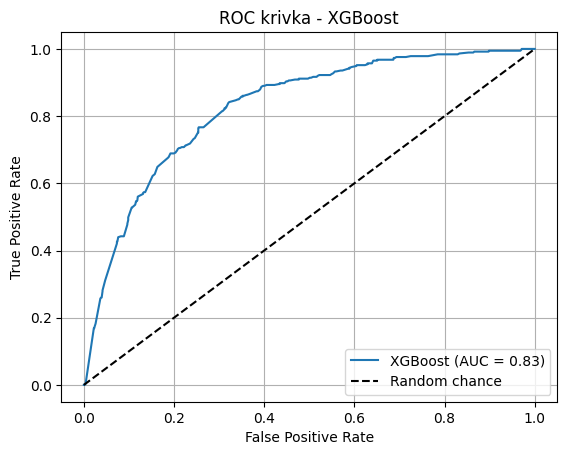

In [145]:
y_prob_xg = xg_model1.predict_proba(X_test)[:, 1]
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_prob_xg)
auc_xg = auc(fpr_xg, tpr_xg)

plt.figure()
plt.plot(fpr_xg, tpr_xg, label=f'XGBoost (AUC = {auc_xg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC krivka - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Porovnanie ROC kriviek

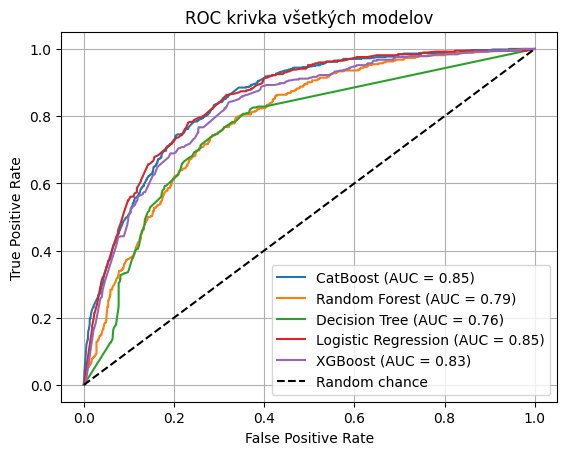

In [141]:
plt.figure()
plt.plot(fpr_cb, tpr_cb, label=f'CatBoost (AUC = {auc_cb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_xg, tpr_xg, label=f'XGBoost (AUC = {auc_xg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC krivka všetkých modelov')
plt.legend(loc='lower right')
plt.grid()
plt.show()